In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from chart_studio.plotly import plot, iplot
import cufflinks as cf
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [100]:
df_train = pd.read_excel('Data_Train.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [101]:
df_test = pd.read_excel('Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### Automate

In [33]:
import pandas_profiling as pf

In [13]:
pf.ProfileReport(df_train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Manual

In [15]:
df_train.shape

(10683, 11)

In [107]:
df_train.drop(axis=0,index=2878,inplace=True)
df_train[df_train['Airline']=='Trujet']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [108]:
df_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [109]:
df_train.dropna(inplace=True)
df_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [110]:
df_train['Date_of_Journey'] = pd.to_datetime(df_train['Date_of_Journey'])
df_train['Day_of_journey'] = df_train['Date_of_Journey'].dt.day
df_train['Month_of_journey'] = df_train['Date_of_Journey'].dt.month
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [111]:
df_train.drop(['Date_of_Journey'],axis=1,inplace=True)

In [112]:
df_train['Dep_hr'] = pd.to_datetime(df_train['Dep_Time']).dt.hour
df_train['Dep_min'] = pd.to_datetime(df_train['Dep_Time']).dt.minute

In [113]:
df_train.drop(['Dep_Time'],axis=1,inplace=True)

In [114]:
df_train['Arrival_hr'] = pd.to_datetime(df_train['Arrival_Time']).dt.hour
df_train['Arrival_min'] = pd.to_datetime(df_train['Arrival_Time']).dt.minute

In [115]:
df_train.drop(['Arrival_Time'],axis=1,inplace=True)

In [116]:
duration = df_train['Duration'].str.split(' ',expand=True)
duration[1].fillna('00m',inplace=True)
df_train['duration_hr'] = duration[0].apply(lambda x:x[:-1])
df_train['duration_min'] = duration[1].apply(lambda x:x[:-1])

In [117]:
df_train.drop(['Duration'],axis=1,inplace=True)
df_train.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00


In [118]:
df_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Name: Airline, dtype: int64

In [119]:
airprices = df_train.groupby('Airline')['Price'].mean().sort_values(ascending=False)
airprices

Airline
Jet Airways Business                 58358.666667
Jet Airways                          11643.923357
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9612.427756
Vistara Premium economy               8962.333333
Vistara                               7796.348643
GoAir                                 5861.056701
IndiGo                                5673.682903
Air Asia                              5590.260188
SpiceJet                              4338.284841
Name: Price, dtype: float64

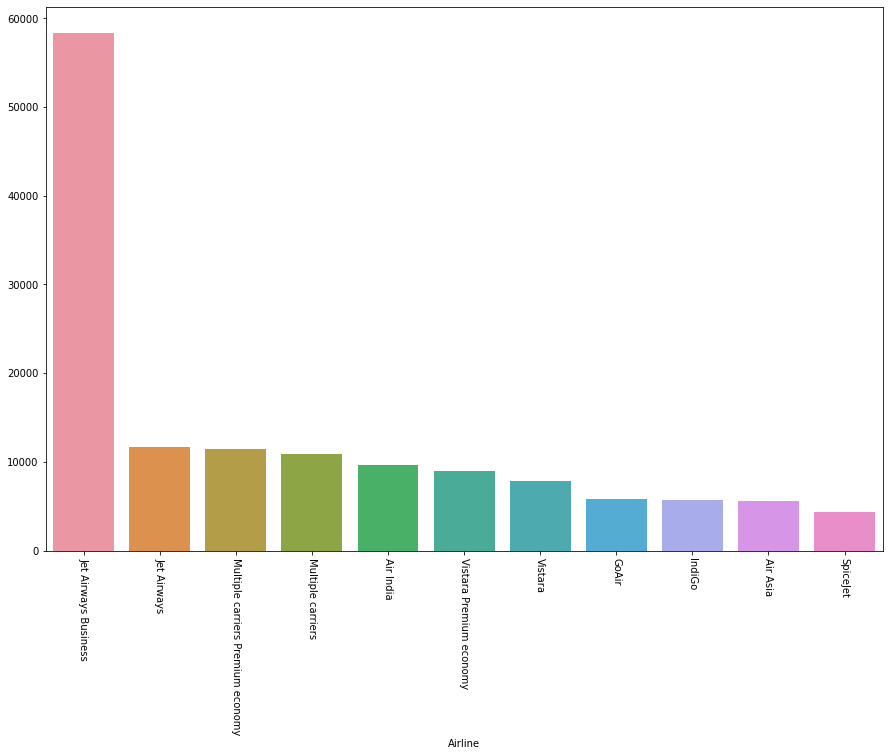

In [120]:
plt.figure(figsize=(15,10))
sns.barplot(airprices.index,airprices.values)
plt.xticks(rotation=270)
plt.show()

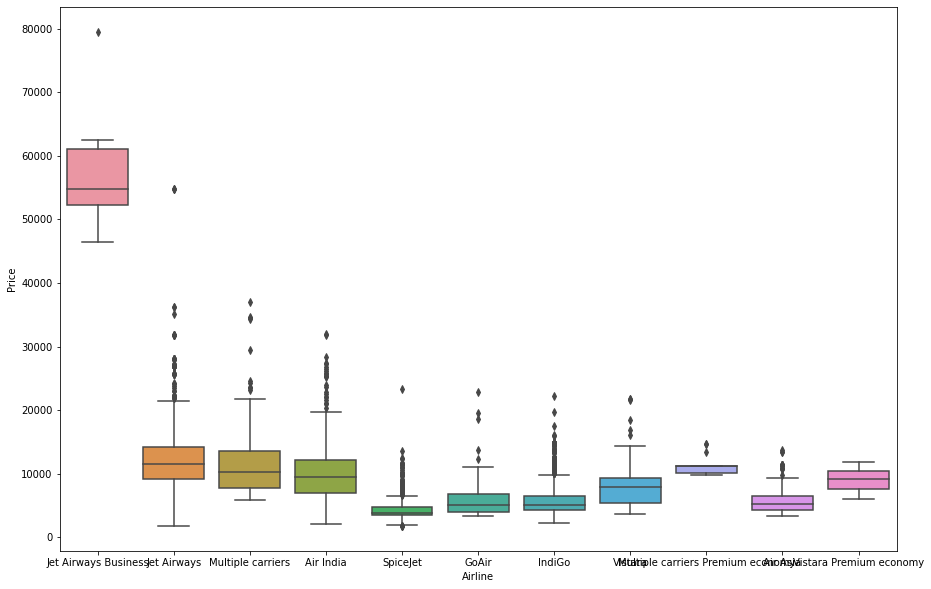

In [121]:
plt.figure(figsize=(15,10))
sns.boxplot(y='Price',x='Airline',data=df_train.sort_values('Price',ascending=False))
plt.show()

In [122]:
df_train.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

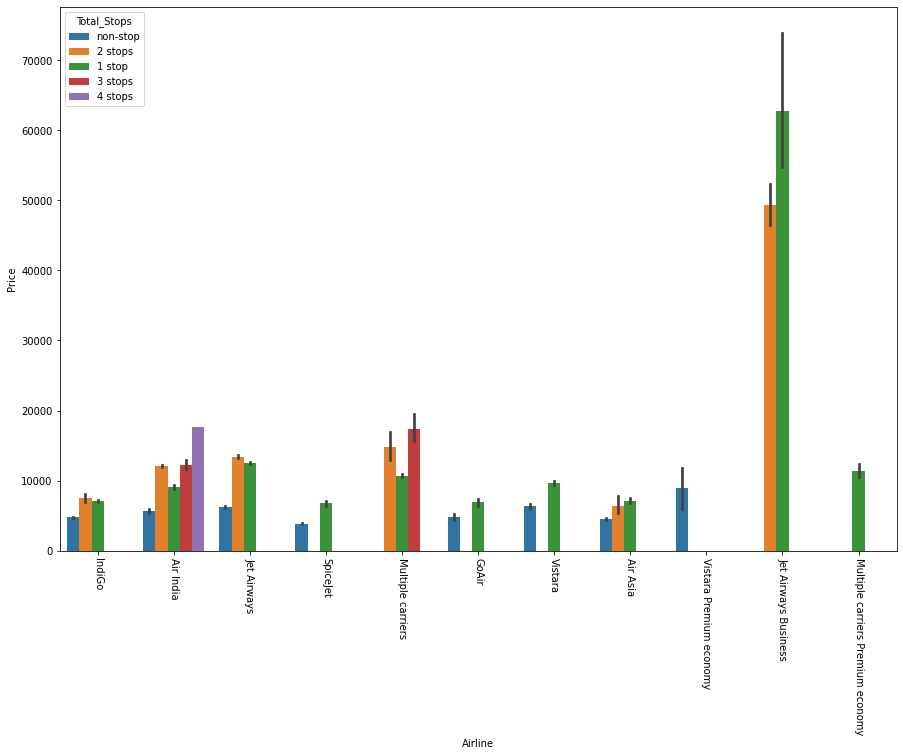

In [123]:
plt.figure(figsize=(15,10))
ax = sns.barplot(y=df_train['Price'],x=df_train['Airline'],hue=df_train['Total_Stops'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=270)
plt.show()

In [124]:
df_train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

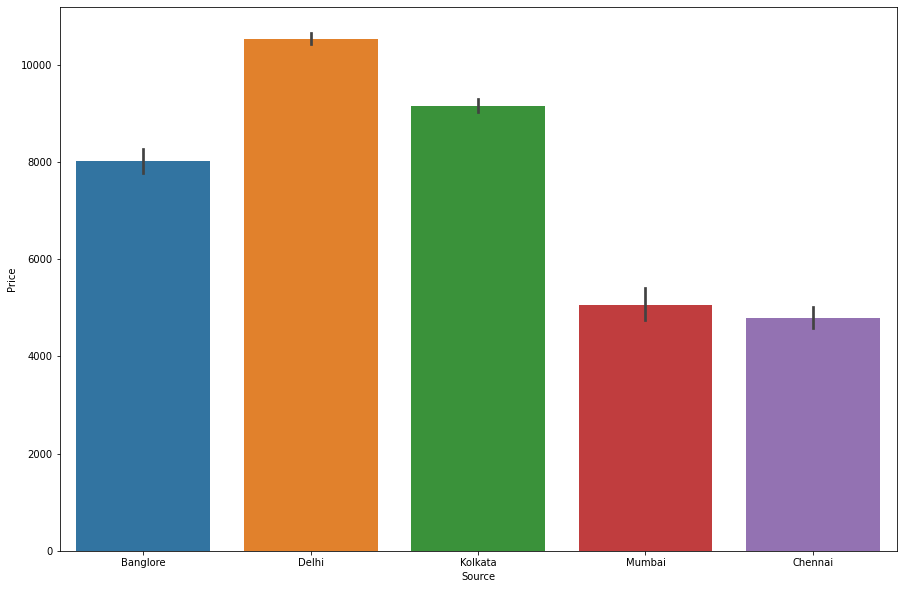

In [125]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df_train.sort_values('Price',ascending=False))
plt.show()

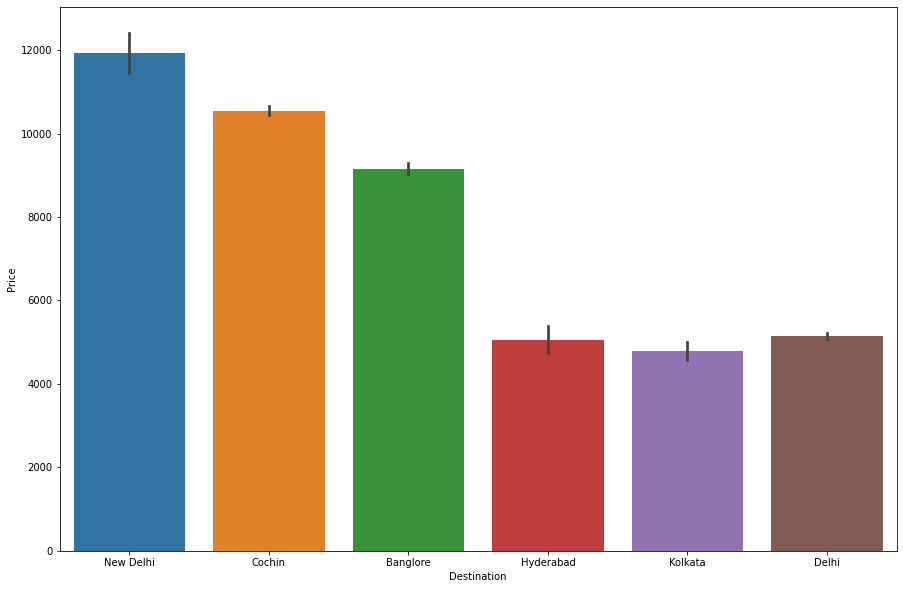

In [126]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df_train.sort_values('Price',ascending=False))
plt.show()

In [127]:
df_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [128]:
for i in df_train:
    df_train.replace('New Delhi','Delhi',inplace=True)

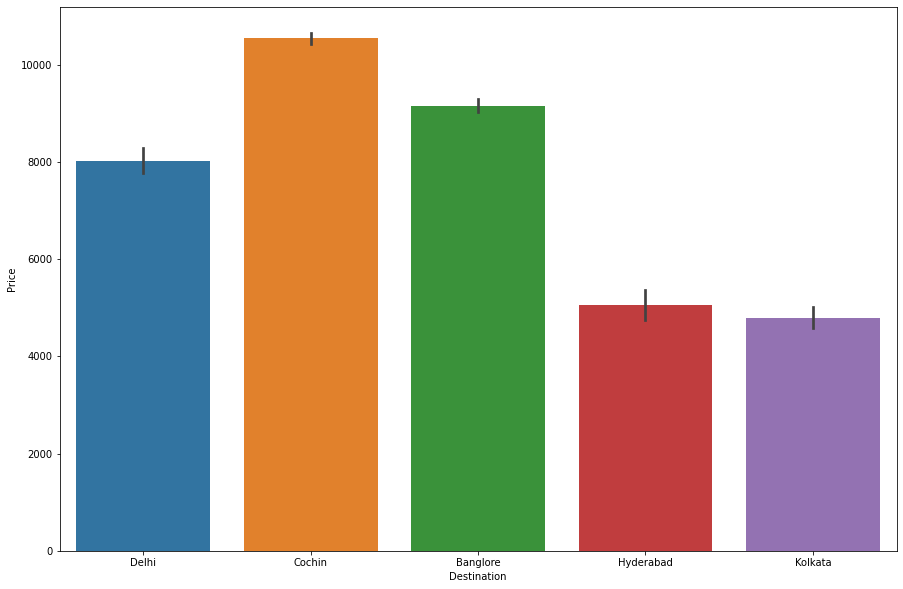

In [129]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df_train.sort_values('Price',ascending=False))
plt.show()

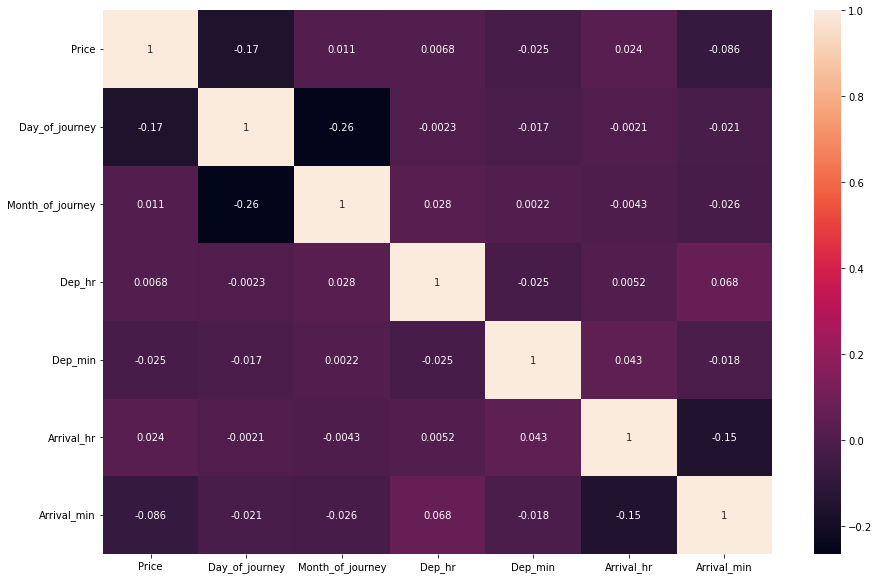

In [130]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [131]:
df_train['Total_Stops'] = df_train['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

In [132]:
air_dummy = pd.get_dummies(df_train['Airline'],drop_first=True)
#air_dummy

source_dest_dummy = pd.get_dummies(df_train[['Source','Destination']],drop_first=True)
#source_dest_dummy

df = pd.concat([air_dummy,source_dest_dummy,df_train],axis=1)
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,...,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [133]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_journey', 'Month_of_journey',
       'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min', 'duration_hr',
       'duration_min'],
      dtype='object')

In [134]:
df.drop(['Airline','Source','Destination'],axis=1,inplace=True)
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_journey',
       'Month_of_journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

In [135]:
df.shape

(10681, 30)

In [136]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [137]:
df_test['Date_of_Journey'] = pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_journey'] = df_test['Date_of_Journey'].dt.day
df_test['Month_of_journey'] = df_test['Date_of_Journey'].dt.month

df_test.drop(['Date_of_Journey'],axis=1,inplace=True)

df_test['Dep_hr'] = pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min'] = pd.to_datetime(df_test['Dep_Time']).dt.minute

df_test.drop(['Dep_Time'],axis=1,inplace=True)

df_test['Arrival_hr'] = pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min'] = pd.to_datetime(df_test['Arrival_Time']).dt.minute

df_test.drop(['Arrival_Time'],axis=1,inplace=True)

duration = df_test['Duration'].str.split(' ',expand=True)
duration[1].fillna('00m',inplace=True)
df_test['duration_hr'] = duration[0].apply(lambda x:x[:-1])
df_test['duration_min'] = duration[1].apply(lambda x:x[:-1])

df_test.drop(['Duration'],axis=1,inplace=True)

for i in df_train:
    df_test.replace('New Delhi','Delhi',inplace=True)

df_test['Total_Stops'] = df_test['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

air_dummy = pd.get_dummies(df_test['Airline'],drop_first=True)
#air_dummy

source_dest_dummy = pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
#source_dest_dummy

df_test = pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)
df_test.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,...,Total_Stops,Additional_Info,Day_of_journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,0,1,0,0,0,0,0,0,...,1,No info,6,6,17,30,4,25,10,55
1,0,0,1,0,0,0,0,0,0,0,...,1,No info,5,12,6,20,10,20,4,00
2,0,0,0,1,0,0,0,0,0,0,...,1,In-flight meal not included,21,5,19,15,19,0,23,45
3,0,0,0,0,0,1,0,0,0,0,...,1,No info,21,5,8,0,21,0,13,00
4,0,0,0,0,0,0,0,0,0,0,...,0,No info,24,6,23,55,2,45,2,50


In [138]:
df_test.drop(['Airline','Source','Destination','Additional_Info','Route'],axis=1,inplace=True)

In [139]:
print(df.shape)
print(df_test.shape)

(10681, 30)
(2671, 27)


In [140]:
df_test.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Total_Stops', 'Day_of_journey', 'Month_of_journey', 'Dep_hr',
       'Dep_min', 'Arrival_hr', 'Arrival_min', 'duration_hr', 'duration_min'],
      dtype='object')

In [141]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_journey',
       'Month_of_journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

In [142]:
X = df.drop(['Additional_Info','Route','Price'],axis=1)
y = df['Price']

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [146]:
from sklearn.ensemble import ExtraTreesRegressor

ET_model = ExtraTreesRegressor(n_estimators=120)
ET_model.fit(X_train,y_train)
y_predict = ET_model.predict(X_test)

from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_predict)

In [147]:
accuracy

0.7721106142198488

In [148]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_train,y_train)
yrf_predict = RF_model.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,yrf_predict)

0.792733173982842

In [149]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

n_estimators = [int(x) for x in np.linspace(start=80,stop=1500,num=10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(6,45,num=5)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

r_grid = {'n_estimators':n_estimators,
         'max_features':max_features,
         'max_depth':max_depth,
         'min_samples_split':min_samples_split,
         'min_samples_leaf':min_samples_leaf}

rf = RandomForestRegressor()
rcv = RandomizedSearchCV(estimator=rf,param_distributions=r_grid,n_iter=10,cv=3,scoring='neg_mean_squared_error',random_state=41,n_jobs=1)


In [150]:
rcv.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=41, scoring='neg_mean_squared_error')

In [151]:
rfcv_predict = rcv.predict(X_test)

r2_score(y_test,rfcv_predict)

0.8069642910156731

In [152]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
cat.fit(X_train,y_train)

Learning rate set to 0.057462
0:	learn: 4460.7661306	total: 186ms	remaining: 3m 6s
1:	learn: 4310.2035375	total: 191ms	remaining: 1m 35s
2:	learn: 4175.6511922	total: 194ms	remaining: 1m 4s
3:	learn: 4044.8065045	total: 197ms	remaining: 49s
4:	learn: 3925.7983700	total: 199ms	remaining: 39.6s
5:	learn: 3816.0907499	total: 202ms	remaining: 33.4s
6:	learn: 3709.2809895	total: 204ms	remaining: 29s
7:	learn: 3611.2902636	total: 206ms	remaining: 25.5s
8:	learn: 3523.7312607	total: 209ms	remaining: 23s
9:	learn: 3456.6778494	total: 211ms	remaining: 20.9s
10:	learn: 3366.7067524	total: 213ms	remaining: 19.1s
11:	learn: 3294.9440103	total: 215ms	remaining: 17.7s
12:	learn: 3221.6767293	total: 218ms	remaining: 16.5s
13:	learn: 3153.8415469	total: 219ms	remaining: 15.5s
14:	learn: 3089.6596525	total: 221ms	remaining: 14.5s
15:	learn: 3035.6222312	total: 223ms	remaining: 13.7s
16:	learn: 2983.8843534	total: 225ms	remaining: 13s
17:	learn: 2940.4458831	total: 227ms	remaining: 12.4s
18:	learn: 2893

197:	learn: 1881.6000412	total: 536ms	remaining: 2.17s
198:	learn: 1880.7052667	total: 538ms	remaining: 2.17s
199:	learn: 1878.1828216	total: 540ms	remaining: 2.16s
200:	learn: 1876.1127848	total: 542ms	remaining: 2.15s
201:	learn: 1875.2793347	total: 544ms	remaining: 2.15s
202:	learn: 1872.9440199	total: 546ms	remaining: 2.14s
203:	learn: 1871.0401000	total: 548ms	remaining: 2.14s
204:	learn: 1870.2663435	total: 550ms	remaining: 2.13s
205:	learn: 1869.8273374	total: 552ms	remaining: 2.13s
206:	learn: 1867.8695487	total: 554ms	remaining: 2.12s
207:	learn: 1865.1233548	total: 556ms	remaining: 2.12s
208:	learn: 1864.1100386	total: 558ms	remaining: 2.11s
209:	learn: 1862.4698064	total: 561ms	remaining: 2.11s
210:	learn: 1861.1615150	total: 563ms	remaining: 2.1s
211:	learn: 1858.6647329	total: 565ms	remaining: 2.1s
212:	learn: 1856.3337348	total: 567ms	remaining: 2.09s
213:	learn: 1855.5181753	total: 569ms	remaining: 2.09s
214:	learn: 1854.1366477	total: 571ms	remaining: 2.08s
215:	learn: 

388:	learn: 1656.2896159	total: 881ms	remaining: 1.38s
389:	learn: 1655.2445425	total: 883ms	remaining: 1.38s
390:	learn: 1654.0359635	total: 885ms	remaining: 1.38s
391:	learn: 1653.1717918	total: 887ms	remaining: 1.38s
392:	learn: 1652.2652699	total: 890ms	remaining: 1.37s
393:	learn: 1650.9620690	total: 891ms	remaining: 1.37s
394:	learn: 1650.0857957	total: 893ms	remaining: 1.37s
395:	learn: 1649.6481673	total: 896ms	remaining: 1.37s
396:	learn: 1648.8829208	total: 899ms	remaining: 1.36s
397:	learn: 1648.0004119	total: 901ms	remaining: 1.36s
398:	learn: 1646.8116432	total: 903ms	remaining: 1.36s
399:	learn: 1645.8060553	total: 906ms	remaining: 1.36s
400:	learn: 1644.6041866	total: 908ms	remaining: 1.35s
401:	learn: 1643.7534114	total: 910ms	remaining: 1.35s
402:	learn: 1642.6781969	total: 912ms	remaining: 1.35s
403:	learn: 1642.5355254	total: 914ms	remaining: 1.35s
404:	learn: 1642.0447539	total: 916ms	remaining: 1.34s
405:	learn: 1641.6475821	total: 918ms	remaining: 1.34s
406:	learn

559:	learn: 1547.3781438	total: 1.23s	remaining: 965ms
560:	learn: 1546.7305034	total: 1.23s	remaining: 963ms
561:	learn: 1545.9971924	total: 1.23s	remaining: 960ms
562:	learn: 1545.6243771	total: 1.23s	remaining: 958ms
563:	learn: 1544.8934435	total: 1.24s	remaining: 955ms
564:	learn: 1544.1467379	total: 1.24s	remaining: 953ms
565:	learn: 1543.7760147	total: 1.24s	remaining: 950ms
566:	learn: 1543.1313209	total: 1.24s	remaining: 948ms
567:	learn: 1542.6380308	total: 1.26s	remaining: 956ms
568:	learn: 1542.2223356	total: 1.26s	remaining: 956ms
569:	learn: 1540.8913341	total: 1.27s	remaining: 955ms
570:	learn: 1540.4790471	total: 1.27s	remaining: 955ms
571:	learn: 1539.4322565	total: 1.27s	remaining: 953ms
572:	learn: 1539.1480645	total: 1.28s	remaining: 951ms
573:	learn: 1538.1764664	total: 1.28s	remaining: 949ms
574:	learn: 1537.5585210	total: 1.28s	remaining: 947ms
575:	learn: 1536.8131517	total: 1.28s	remaining: 945ms
576:	learn: 1536.4470151	total: 1.29s	remaining: 943ms
577:	learn

739:	learn: 1454.2699125	total: 1.57s	remaining: 553ms
740:	learn: 1453.8150372	total: 1.58s	remaining: 551ms
741:	learn: 1453.1789285	total: 1.58s	remaining: 549ms
742:	learn: 1452.7952228	total: 1.58s	remaining: 546ms
743:	learn: 1452.2485092	total: 1.58s	remaining: 544ms
744:	learn: 1452.0214739	total: 1.58s	remaining: 542ms
745:	learn: 1451.2072898	total: 1.58s	remaining: 540ms
746:	learn: 1450.7347583	total: 1.59s	remaining: 537ms
747:	learn: 1450.5363091	total: 1.59s	remaining: 535ms
748:	learn: 1450.3211438	total: 1.59s	remaining: 533ms
749:	learn: 1450.0403841	total: 1.59s	remaining: 531ms
750:	learn: 1449.5121567	total: 1.59s	remaining: 528ms
751:	learn: 1448.8128443	total: 1.59s	remaining: 526ms
752:	learn: 1448.3727386	total: 1.6s	remaining: 524ms
753:	learn: 1448.1089192	total: 1.6s	remaining: 522ms
754:	learn: 1447.4870493	total: 1.6s	remaining: 519ms
755:	learn: 1447.1056815	total: 1.6s	remaining: 517ms
756:	learn: 1446.4842585	total: 1.6s	remaining: 515ms
757:	learn: 144

906:	learn: 1394.6487897	total: 1.92s	remaining: 197ms
907:	learn: 1394.4533904	total: 1.92s	remaining: 195ms
908:	learn: 1394.1870421	total: 1.92s	remaining: 192ms
909:	learn: 1393.7420943	total: 1.92s	remaining: 190ms
910:	learn: 1393.3319067	total: 1.93s	remaining: 188ms
911:	learn: 1393.1404923	total: 1.93s	remaining: 186ms
912:	learn: 1392.6226773	total: 1.93s	remaining: 184ms
913:	learn: 1392.2040074	total: 1.93s	remaining: 182ms
914:	learn: 1391.8941795	total: 1.93s	remaining: 180ms
915:	learn: 1391.7096532	total: 1.94s	remaining: 178ms
916:	learn: 1391.5164415	total: 1.94s	remaining: 175ms
917:	learn: 1391.3956272	total: 1.94s	remaining: 173ms
918:	learn: 1390.9823560	total: 1.94s	remaining: 171ms
919:	learn: 1390.6202590	total: 1.94s	remaining: 169ms
920:	learn: 1389.9547950	total: 1.95s	remaining: 167ms
921:	learn: 1389.5829310	total: 1.95s	remaining: 165ms
922:	learn: 1389.0357134	total: 1.95s	remaining: 163ms
923:	learn: 1388.6968535	total: 1.95s	remaining: 160ms
924:	learn

In [154]:
cat_predict = cat.predict(X_test)
r2_score(y_test,cat_predict)

0.8357450279343848

In [155]:
X_train[['duration_hr', 'duration_min']] = X_train[['duration_hr', 'duration_min']].astype(int)
X_test[['duration_hr', 'duration_min']] = X_test[['duration_hr', 'duration_min']].astype(int)

In [156]:
from lightgbm import LGBMRegressor
lgb_model = LGBMRegressor()
lgb_model.fit(X_train,y_train)

lgb_predict = lgb_model.predict(X_test)
r2_score(y_test,lgb_predict)

0.8084859963815405

In [157]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train,y_train)

xgb_predict = xgb.predict(X_test)
r2_score(y_test,xgb_predict)

0.8247006334167172

In [159]:
import pickle

pickle.dump(cat,open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))

In [160]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_journey',
       'Month_of_journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

In [162]:
deploy_df = df.drop(['Route','Additional_Info'],axis=1)
deploy_df.to_csv('deploy_df.csv')